In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision import models







In [ ]:


# Load CIFAR-10 dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels (CIFAR-10 has 10 classes)
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Split the training data into training and validation sets
x_train, x_val, y_train_encoded, y_val_encoded = train_test_split(
    x_train, y_train_encoded, test_size=0.2, random_state=42
)

# Print the shapes of the new datasets
print("Training set shape:", x_train.shape, y_train_encoded.shape)
print("Validation set shape:", x_val.shape, y_val_encoded.shape)
print("Test set shape:", x_test.shape, y_test_encoded.shape)


# Get the unique labels by finding the index of the 1 in each one-hot encoded vector
unique_train_labels = np.argmax(y_train_encoded, axis=1)
unique_test_labels = np.argmax(y_test_encoded, axis=1)

# Print the unique labels
print("Unique labels in the training set:", np.unique(unique_train_labels))
print("Unique labels in the test set:", np.unique(unique_test_labels))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training set shape: (40000, 32, 32, 3) (40000, 10)
Validation set shape: (10000, 32, 32, 3) (10000, 10)
Test set shape: (10000, 32, 32, 3) (10000, 10)
Unique labels in the training set: [0 1 2 3 4 5 6 7 8 9]
Unique labels in the test set: [0 1 2 3 4 5 6 7 8 9]


In [ ]:

# Load ResNet-18 with pretrained weights
resnet18 = models.resnet18(pretrained=True)

# Replace the first convolution layer to handle 32×32×3 images
resnet18.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

# Remove the Max Pooling Layer after the first convolution
resnet18.maxpool = nn.Identity()

# Replace the Fully Connected Layer with a layer that outputs 10 classes
resnet18.fc = nn.Linear(in_features=512, out_features=10)

# Print the model
print(resnet18)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.001)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 163MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): Identity()
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [ ]:
# Calculate and print the total, trainable, and non-trainable parameters
total_params = sum(p.numel() for p in resnet18.parameters())
trainable_params = sum(p.numel() for p in resnet18.parameters() if p.requires_grad)
non_trainable_params = total_params - trainable_params

print(f"Total params: {total_params}")
print(f"Trainable params: {trainable_params}")
print(f"Non-trainable params: {non_trainable_params}")


Total params: 11173962
Trainable params: 11173962
Non-trainable params: 0


In [ ]:
# Define CIFAR-10 data transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Split the CIFAR-10 training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create DataLoaders for training, validation, and testing datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)  # No shuffling for validation
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170M/170M [00:04<00:00, 42.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import torch
from tqdm import tqdm

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model to the selected device
resnet18 = resnet18.to(device)

# Training parameters
num_epochs = 10
early_stopping_patience = 3  # Stop after 3 epochs of no improvement
best_val_loss = float('inf')
epochs_without_improvement = 0

# Training loop with validation
for epoch in range(num_epochs):
    resnet18.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Use tqdm for a progress bar
    loop = tqdm(train_loader, leave=True, desc=f"Epoch {epoch+1}/{num_epochs}")
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)  # Move data to the device

        # Forward pass
        outputs = resnet18(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        # Update progress bar
        loop.set_postfix(loss=loss.item(), accuracy=100.0 * correct_predictions / total_samples)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100.0 * correct_predictions / total_samples
    print(f"Epoch {epoch+1}: Training Loss = {epoch_loss:.4f}, Training Accuracy = {epoch_accuracy:.2f}%")

    # Validation loop
    resnet18.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct_predictions = 0
    val_total_samples = 0

    with torch.no_grad():  # No gradient computation during validation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = resnet18(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Track accuracy
            _, predicted = torch.max(outputs, 1)
            val_correct_predictions += (predicted == labels).sum().item()
            val_total_samples += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = 100.0 * val_correct_predictions / val_total_samples
    print(f"Epoch {epoch+1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_accuracy:.2f}%")

    # Early Stopping Check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0  # Reset the counter if we improve
    else:
        epochs_without_improvement += 1

    # Stop if no improvement for a certain number of epochs
    if epochs_without_improvement >= early_stopping_patience:
        print(f"Early stopping after epoch {epoch+1}")
        break

# Test loop
resnet18.eval()  # Set the model to evaluation mode
test_loss = 0.0
correct_predictions = 0
total_samples = 0

with torch.no_grad():  # No gradient computation during testing
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Track accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

# Final evaluation results
test_loss /= len(test_loader)
test_accuracy = 100.0 * correct_predictions / total_samples
print(f"Test Loss = {test_loss:.4f}")
print(f"Test Accuracy = {test_accuracy:.2f}%")


Using device: cuda


Epoch 1/10: 100%|██████████| 625/625 [00:52<00:00, 11.90it/s, accuracy=67.1, loss=0.738]


Epoch 1: Training Loss = 0.9477, Training Accuracy = 67.11%
Epoch 1: Validation Loss = 0.6621, Validation Accuracy = 77.42%


Epoch 2/10: 100%|██████████| 625/625 [00:50<00:00, 12.42it/s, accuracy=80, loss=0.555]


Epoch 2: Training Loss = 0.5908, Training Accuracy = 79.95%
Epoch 2: Validation Loss = 0.5293, Validation Accuracy = 82.22%


Epoch 3/10: 100%|██████████| 625/625 [00:50<00:00, 12.43it/s, accuracy=83.7, loss=0.343]


Epoch 3: Training Loss = 0.4797, Training Accuracy = 83.70%
Epoch 3: Validation Loss = 0.5925, Validation Accuracy = 79.87%


Epoch 4/10: 100%|██████████| 625/625 [00:50<00:00, 12.45it/s, accuracy=86.1, loss=0.576]


Epoch 4: Training Loss = 0.4099, Training Accuracy = 86.12%
Epoch 4: Validation Loss = 0.4544, Validation Accuracy = 84.64%


Epoch 5/10: 100%|██████████| 625/625 [00:50<00:00, 12.42it/s, accuracy=87.8, loss=0.354]


Epoch 5: Training Loss = 0.3588, Training Accuracy = 87.83%
Epoch 5: Validation Loss = 0.3977, Validation Accuracy = 86.51%


Epoch 6/10: 100%|██████████| 625/625 [00:50<00:00, 12.45it/s, accuracy=89, loss=0.371]


Epoch 6: Training Loss = 0.3246, Training Accuracy = 89.00%
Epoch 6: Validation Loss = 0.3472, Validation Accuracy = 88.34%


Epoch 7/10: 100%|██████████| 625/625 [00:50<00:00, 12.42it/s, accuracy=90.1, loss=0.363]


Epoch 7: Training Loss = 0.2904, Training Accuracy = 90.08%
Epoch 7: Validation Loss = 0.3826, Validation Accuracy = 87.59%


Epoch 8/10: 100%|██████████| 625/625 [00:50<00:00, 12.46it/s, accuracy=90.9, loss=0.143]


Epoch 8: Training Loss = 0.2656, Training Accuracy = 90.95%
Epoch 8: Validation Loss = 0.3504, Validation Accuracy = 88.11%


Epoch 9/10: 100%|██████████| 625/625 [00:50<00:00, 12.47it/s, accuracy=91.5, loss=0.156]


Epoch 9: Training Loss = 0.2483, Training Accuracy = 91.52%
Epoch 9: Validation Loss = 0.3206, Validation Accuracy = 89.40%


Epoch 10/10: 100%|██████████| 625/625 [00:50<00:00, 12.43it/s, accuracy=92.2, loss=0.135]


Epoch 10: Training Loss = 0.2249, Training Accuracy = 92.18%
Epoch 10: Validation Loss = 0.3492, Validation Accuracy = 88.54%
Test Loss = 0.3755
Test Accuracy = 88.02%


In [ ]:
# Final validation evaluation
resnet18.eval()  # Set the model to evaluation mode
val_loss = 0.0
correct_predictions = 0
total_samples = 0

with torch.no_grad():  # No gradient computation during evaluation
    for images, labels in val_loader:  # Use the validation DataLoader
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        # Track accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

# Print final validation results
print(f"Final Validation Loss = {val_loss / len(val_loader):.4f}")
print(f"Final Validation Accuracy = {100.0 * correct_predictions / total_samples:.2f}%")


Final Validation Loss = 0.3455
Final Validation Accuracy = 88.60%


In [ ]:
# Count total parameters
total_params = sum(p.numel() for p in resnet18.parameters())

# Count trainable parameters
trainable_params = sum(p.numel() for p in resnet18.parameters() if p.requires_grad)

# Count non-trainable parameters
non_trainable_params = total_params - trainable_params

# Print parameter breakdown
print(f"Total params: {total_params:,} ({total_params * 4 / (1024 ** 2):.2f} MB)")  # Assuming 4 bytes per parameter
print(f"Trainable params: {trainable_params:,} ({trainable_params * 4 / (1024 ** 2):.2f} MB)")
print(f"Non-trainable params: {non_trainable_params:,} ({non_trainable_params * 4 / 1024:.2f} KB)")


Total params: 11,173,962 (42.63 MB)
Trainable params: 11,173,962 (42.63 MB)
Non-trainable params: 0 (0.00 KB)


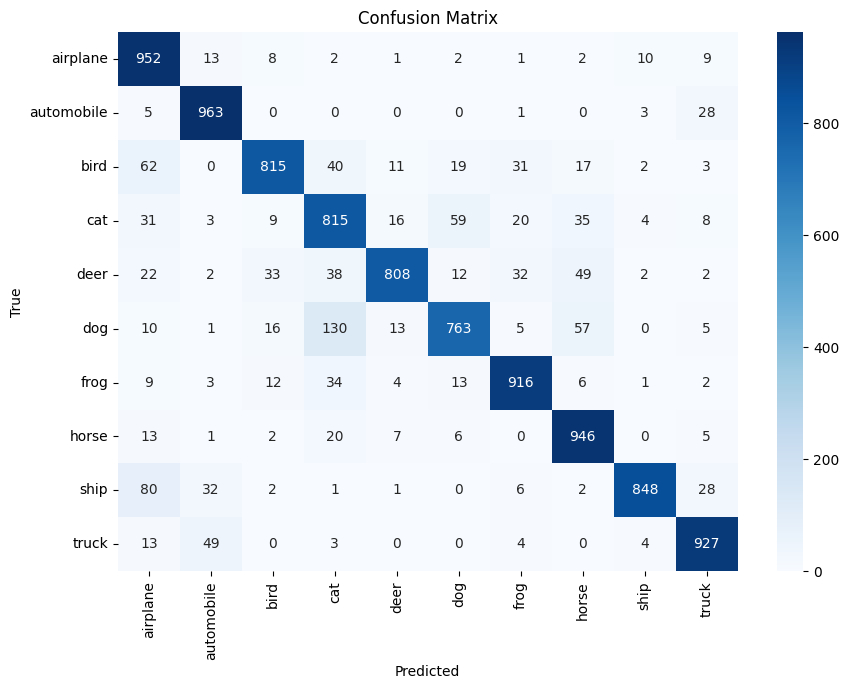

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to generate confusion matrix
def plot_confusion_matrix(model, dataloader, classes, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # No gradient computation during inference
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# List of class names in CIFAR-10
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck'
]

# Plot confusion matrix for test dataset
plot_confusion_matrix(resnet18, test_loader, classes, device)


In [ ]:
# Print the structure of the ResNet-18 model
from torchsummary import summary
import torch
import torchvision.models as models

# Load ResNet-18 model
resnet18 = models.resnet18(pretrained=True)

# Modify the model for CIFAR-10 (if needed)
resnet18.fc = torch.nn.Linear(in_features=512, out_features=10)

# Check if GPU is available and move the model to the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = resnet18.to(device)

# Display model summary in table format
summary(resnet18, input_size=(3, 32, 32))


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

In [ ]:
import torch

# Save only the model's state_dict (recommended approach)
torch.save(resnet18.state_dict(), "resnet18_cifar10.pth")
print("Model saved successfully!")


Model saved successfully!
